# 1 Exploratory Data Analysis

## Introduction

After the cleaning data step we put our data into a few standard formats, the next step is to take a look at the data and see if what we are looking at makes sense. Before applying any fancy algorithms. It's always important to explore our data first.

When working with numerical data, some of the exploratory data analysis (EDA) techniques we can use to include finding the average of the data set, the distribution of the data, the most common values etc. The idea is the same when working with text data. We are going to find some more obvious patterns with EDA before identifying the hidden patterns with machine learning(ML) techniques. We are going at the following for each comedian.

     1. Most Common Words - find these and create word clouds
     2. Size of the vocabulary - look number of unique words and also how quickly someone speaks 
     3. Amount of profanity - most common terms

## 1.2 Most Common Words

### 1.2.1 Analysis

In [1]:
# Read the document term matrix
import pandas as pd

data = pd.read_pickle('dtm.pkl')

# here converting from document-term-matrix to term-document-matrix
data = data.transpose()


data.head()



,ali,anthony,bill,bo,dave,hasan,jim,joe,john,louis,mike,ricky
aaaaah,0,0,1,0,0,0,0,0,0,0,0,0
aaaaahhhhhhh,0,0,0,1,0,0,0,0,0,0,0,0
aaaaauuugghhhhhh,0,0,0,1,0,0,0,0,0,0,0,0
aaaahhhhh,0,0,0,1,0,0,0,0,0,0,0,0
aaah,0,0,0,0,1,0,0,0,0,0,0,0


In [2]:
# find the top 30 words said by each comedian
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30)
    top_dict[c] = list(zip(top.index, top.values))
    
top_dict

{'ali': [('like', 126),
  ('know', 65),
  ('just', 64),
  ('don', 61),
  ('shit', 34),
  ('gonna', 28),
  ('ok', 26),
  ('lot', 24),
  ('wanna', 21),
  ('gotta', 21),
  ('oh', 21),
  ('husband', 20),
  ('got', 19),
  ('right', 19),
  ('women', 19),
  ('time', 19),
  ('cause', 18),
  ('day', 17),
  ('people', 16),
  ('pregnant', 15),
  ('need', 14),
  ('god', 14),
  ('yeah', 13),
  ('tell', 13),
  ('dude', 12),
  ('work', 12),
  ('really', 12),
  ('baby', 11),
  ('look', 11),
  ('fuck', 11)],
 'anthony': [('like', 50),
  ('know', 39),
  ('don', 38),
  ('joke', 35),
  ('got', 34),
  ('said', 31),
  ('ve', 28),
  ('anthony', 27),
  ('day', 26),
  ('just', 26),
  ('say', 26),
  ('people', 23),
  ('guys', 22),
  ('tell', 19),
  ('grandma', 19),
  ('right', 18),
  ('thing', 18),
  ('time', 17),
  ('think', 17),
  ('did', 16),
  ('dad', 16),
  ('baby', 16),
  ('school', 16),
  ('good', 16),
  ('yeah', 16),
  ('gonna', 15),
  ('jokes', 15),
  ('okay', 15),
  ('didn', 14),
  ('mad', 14)],
 'bil

In [3]:
# print the top 15 words said by each comedian

for comedian, top_words in top_dict.items():
    
    print (comedian)
    print (' '.join([word for word, count in top_words[0:14]]))
    print ('---')
    
# down here everyone is saying 'like' a lot then it is not meaningful in our data, so we'll add these common words
# to our stop words list

ali
like know just don shit gonna ok lot wanna gotta oh husband got right
---
anthony
like know don joke got said ve anthony day just say people guys tell
---
bill
like just right know don gonna got fucking yeah shit dude ll fuck want
---
bo
know like love bo think just stuff repeat don yeah want right cos ve
---
dave
like know said just shit people didn don ahah time fuck fucking black man
---
hasan
like know don dad just going want got love ve hasan right say time
---
jim
like don right fucking just went know ve people day oh think going fuck
---
joe
like people just don fucking fuck gonna know think shit got right man house
---
john
like know just don said clinton right little hey time got mom cause people
---
louis
like just know don people life thing gonna cause shit time good tit think
---
mike
like know said just don think says jenny cause right goes really point mean
---
ricky
right like just don know ve said yeah fucking got say went people didn
---


In [4]:
# Look at the most common top words --> add them to the stop words list
from collections import Counter 

# Let's pull out the top 30 words for each comedian

words = []

for comedian in data.columns:
    
    top = [word for (word, count) in top_dict[comedian]]
    
    for t in top:
        
        words.append(t)
        
words 

['like',
 'know',
 'just',
 'don',
 'shit',
 'gonna',
 'ok',
 'lot',
 'wanna',
 'gotta',
 'oh',
 'husband',
 'got',
 'right',
 'women',
 'time',
 'cause',
 'day',
 'people',
 'pregnant',
 'need',
 'god',
 'yeah',
 'tell',
 'dude',
 'work',
 'really',
 'baby',
 'look',
 'fuck',
 'like',
 'know',
 'don',
 'joke',
 'got',
 'said',
 've',
 'anthony',
 'day',
 'just',
 'say',
 'people',
 'guys',
 'tell',
 'grandma',
 'right',
 'thing',
 'time',
 'think',
 'did',
 'dad',
 'baby',
 'school',
 'good',
 'yeah',
 'gonna',
 'jokes',
 'okay',
 'didn',
 'mad',
 'like',
 'just',
 'right',
 'know',
 'don',
 'gonna',
 'got',
 'fucking',
 'yeah',
 'shit',
 'dude',
 'll',
 'fuck',
 'want',
 'think',
 'guy',
 'let',
 'people',
 'did',
 'didn',
 'make',
 'thing',
 'come',
 'going',
 'little',
 'doing',
 'everybody',
 'kid',
 'say',
 'old',
 'know',
 'like',
 'love',
 'bo',
 'think',
 'just',
 'stuff',
 'repeat',
 'don',
 'yeah',
 'want',
 'right',
 'cos',
 've',
 'fucking',
 'people',
 'eye',
 'said',
 'c

In [5]:
# Let's aggregate this list and identify the most common words along with how many routines they have
Counter(words).most_common()

[('like', 12),
 ('know', 12),
 ('just', 12),
 ('don', 12),
 ('right', 12),
 ('people', 12),
 ('got', 10),
 ('time', 9),
 ('say', 9),
 ('gonna', 8),
 ('oh', 8),
 ('said', 8),
 ('think', 8),
 ('yeah', 7),
 ('fuck', 7),
 ('didn', 7),
 ('cause', 6),
 ('really', 6),
 ('ve', 6),
 ('good', 6),
 ('fucking', 6),
 ('going', 6),
 ('shit', 5),
 ('day', 5),
 ('thing', 5),
 ('did', 5),
 ('ll', 5),
 ('want', 5),
 ('guy', 4),
 ('come', 4),
 ('little', 4),
 ('man', 4),
 ('women', 3),
 ('dude', 3),
 ('guys', 3),
 ('dad', 3),
 ('let', 3),
 ('old', 3),
 ('life', 3),
 ('went', 3),
 ('way', 3),
 ('mean', 3),
 ('ok', 2),
 ('lot', 2),
 ('gotta', 2),
 ('god', 2),
 ('tell', 2),
 ('baby', 2),
 ('look', 2),
 ('joke', 2),
 ('school', 2),
 ('make', 2),
 ('everybody', 2),
 ('love', 2),
 ('mom', 2),
 ('hey', 2),
 ('white', 2),
 ('girl', 2),
 ('goes', 2),
 ('house', 2),
 ('real', 2),
 ('kids', 2),
 ('wanna', 1),
 ('husband', 1),
 ('pregnant', 1),
 ('need', 1),
 ('work', 1),
 ('anthony', 1),
 ('grandma', 1),
 ('jokes',

In [6]:
# if more than half of the comedians have it as a top word, exclude it from the list

add_stop_words = [word for word, count in Counter(words).most_common() if count > 6]
add_stop_words

['like',
 'know',
 'just',
 'don',
 'right',
 'people',
 'got',
 'time',
 'say',
 'gonna',
 'oh',
 'said',
 'think',
 'yeah',
 'fuck',
 'didn']

In [7]:
# Let's update our document - term matrix with the new list of stop words

from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer

# Read in cleaned data

data_clean = pd.read_pickle('data_clean.pkl')

# Add new stop words 
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# Recreate document term matrix
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_clean.transcript)
data_stop = pd.DataFrame(data_cv.toarray(), columns = cv.get_feature_names())
data_stop.index = data_clean.index

#pickle it for later use
import pickle
pickle.dump(cv, open("cv_stop.pkl", "wb"))
data_stop.to_pickle("dtm_stop.pkl")

In [8]:
stop_words

frozenset({'a',
           'about',
           'above',
           'across',
           'after',
           'afterwards',
           'again',
           'against',
           'all',
           'almost',
           'alone',
           'along',
           'already',
           'also',
           'although',
           'always',
           'am',
           'among',
           'amongst',
           'amoungst',
           'amount',
           'an',
           'and',
           'another',
           'any',
           'anyhow',
           'anyone',
           'anything',
           'anyway',
           'anywhere',
           'are',
           'around',
           'as',
           'at',
           'back',
           'be',
           'became',
           'because',
           'become',
           'becomes',
           'becoming',
           'been',
           'before',
           'beforehand',
           'behind',
           'being',
           'below',
           'beside',
           'besides'

In [9]:
text.ENGLISH_STOP_WORDS

frozenset({'a',
           'about',
           'above',
           'across',
           'after',
           'afterwards',
           'again',
           'against',
           'all',
           'almost',
           'alone',
           'along',
           'already',
           'also',
           'although',
           'always',
           'am',
           'among',
           'amongst',
           'amoungst',
           'amount',
           'an',
           'and',
           'another',
           'any',
           'anyhow',
           'anyone',
           'anything',
           'anyway',
           'anywhere',
           'are',
           'around',
           'as',
           'at',
           'back',
           'be',
           'became',
           'because',
           'become',
           'becomes',
           'becoming',
           'been',
           'before',
           'beforehand',
           'behind',
           'being',
           'below',
           'beside',
           'besides'

In [13]:
# Let's make some word clouds 
# in Anaconda Prompt execute the following command " pip install wordcloud"
from wordcloud import WordCloud

wc = WordCloud(stopwords=stop_words, background_color='white', colormap='Dark2', 
              max_font_size=150, random_state=42) 

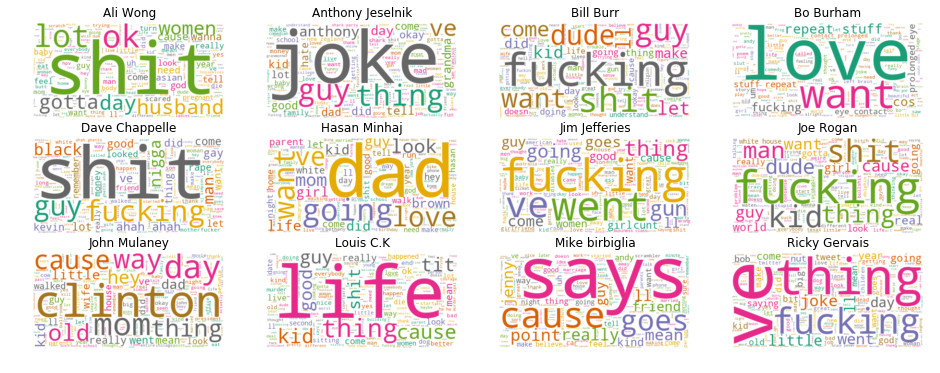

In [19]:
# Reset the output dimensions
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [16, 6]

full_names = ['Ali Wong', 'Anthony Jeselnik', 'Bill Burr', 'Bo Burham', 'Dave Chappelle', 'Hasan Minhaj',
             'Jim Jefferies', 'Joe Rogan', 'John Mulaney', 'Louis C.K','Mike birbiglia', 'Ricky Gervais'] 


# create subplots for each comedians
for index, comedian in enumerate(data.columns):
    
    wc.generate(data_clean.transcript[comedian])
    
    plt.subplot(3, 4, index+1)
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(full_names[index])
    
plt.show()
    
    


## 1.2.2 Findings 
- Ali Wong says the s-word alot and talks about her husband. I guess that's funny to me.
- a lot of people use the f-word. Lets dig into that later.

# 1.3 Number of Words

## 1.3.1 Analysis 

In [21]:
# Find the number of words that each comedian used

# Identify the non zero terms in document-term-matrix , meaning that the word at least occurs

unique_list = []

for comedian in data.columns:
    
    uniques = data[comedian].nonzero()[0].size
    unique_list.append(uniques)
    
# Create a new dataframe that contains this unique word count

data_words = pd.DataFrame(list(zip(full_names, unique_list)), columns=['comedians', 'unique_words'])
data_unique_sort = data_words.sort_values(by='unique_words')
data_unique_sort

,comedians,unique_words
1,Anthony Jeselnik,956
9,Louis C.K,1046
3,Bo Burham,1246
6,Jim Jefferies,1273
0,Ali Wong,1319
8,John Mulaney,1343
4,Dave Chappelle,1360
7,Joe Rogan,1391
10,Mike birbiglia,1453
5,Hasan Minhaj,1524


In [22]:
# calculate the words per minute of each comedian 

# Find the total number of words a comedian used

total_list = []

for comedian in data.columns:
    
    totals = sum(data[comedian])
    total_list.append(totals)
    
    
# comedy special run time form imdb, in minuits

run_times = [60, 59, 80, 60, 67,73, 77, 63, 62, 58, 76, 79]

# Lets add some columns to our dataframe

data_words['total_words'] = total_list
data_words['run_times'] = run_times
data_words['words_per_minute'] = data_words['total_words'] / data_words['run_times']

# Sort the dataframe by words per minuits to see who talks the fastest and slowest

data_wpm_wort = data_words.sort_values(by='words_per_minute')
data_wpm_wort

,comedians,unique_words,total_words,run_times,words_per_minute
1,Anthony Jeselnik,956,2766,59,46.881356
3,Bo Burham,1246,3048,60,50.800000
0,Ali Wong,1319,3098,60,51.633333
9,Louis C.K,1046,3071,58,52.948276
6,Jim Jefferies,1273,4459,77,57.909091
10,Mike birbiglia,1453,4428,76,58.263158
11,Ricky Gervais,1583,4627,79,58.569620
4,Dave Chappelle,1360,3925,67,58.582090
5,Hasan Minhaj,1524,4457,73,61.054795
8,John Mulaney,1343,3823,62,61.661290


Text(0.5, 1.0, 'Number of Words Per Minuit')

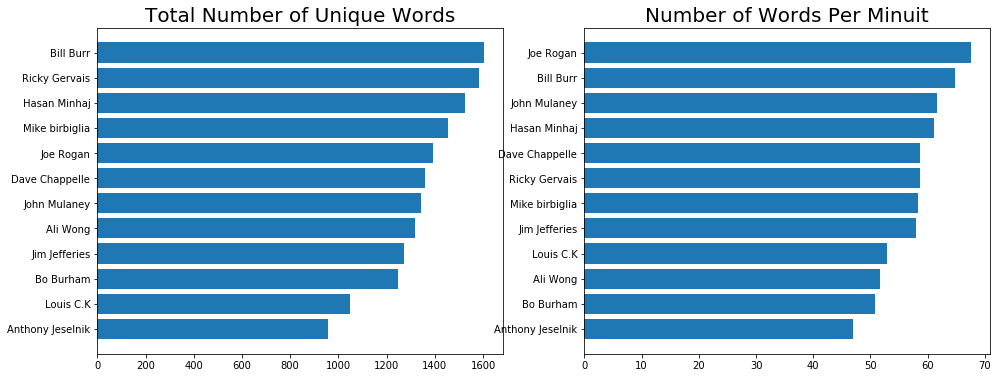

In [24]:
# Lets create our finding 

import numpy as np

y_pos = np.arange(len(data_words))

plt.subplot(1, 2, 1)
plt.barh(y_pos, data_unique_sort.unique_words, align='center')
plt.yticks(y_pos, data_unique_sort.comedians)
plt.title('Total Number of Unique Words', fontsize=20)

plt.subplot(1, 2, 2)
plt.barh(y_pos, data_wpm_wort.words_per_minute, align='center')
plt.yticks(y_pos, data_wpm_wort.comedians)
plt.title('Number of Words Per Minuit', fontsize=20)



## 1.3.2 Findings

- __Vocabulary__

    - Ricky Gervals (British Comedy) Bill Bur (Podcast host) use a lot of words in their comedy.
    - Louis C.K. (self-depricating comedy) Anthony Jeselnik (dark humor) have a smaller vocabulary.
    
- __Talking Speed__

    - Joe Rogan (blue comedy) and Bill Bur(podcast host) talk fast.
    - Bo Burham (musical comedy) and Anthony jeselnik (dark humor) talk slow.
    
Ali Wong is somewhere in the middle of both cases. Nothing too interesting here.


# 1.4 Amout of Profanity

## 1.4.1 Analysis

In [25]:
# Here we'll visit profanity. Lets take a look at the most common words again.

Counter(words).most_common()

[('like', 12),
 ('know', 12),
 ('just', 12),
 ('don', 12),
 ('right', 12),
 ('people', 12),
 ('got', 10),
 ('time', 9),
 ('say', 9),
 ('gonna', 8),
 ('oh', 8),
 ('said', 8),
 ('think', 8),
 ('yeah', 7),
 ('fuck', 7),
 ('didn', 7),
 ('cause', 6),
 ('really', 6),
 ('ve', 6),
 ('good', 6),
 ('fucking', 6),
 ('going', 6),
 ('shit', 5),
 ('day', 5),
 ('thing', 5),
 ('did', 5),
 ('ll', 5),
 ('want', 5),
 ('guy', 4),
 ('come', 4),
 ('little', 4),
 ('man', 4),
 ('women', 3),
 ('dude', 3),
 ('guys', 3),
 ('dad', 3),
 ('let', 3),
 ('old', 3),
 ('life', 3),
 ('went', 3),
 ('way', 3),
 ('mean', 3),
 ('ok', 2),
 ('lot', 2),
 ('gotta', 2),
 ('god', 2),
 ('tell', 2),
 ('baby', 2),
 ('look', 2),
 ('joke', 2),
 ('school', 2),
 ('make', 2),
 ('everybody', 2),
 ('love', 2),
 ('mom', 2),
 ('hey', 2),
 ('white', 2),
 ('girl', 2),
 ('goes', 2),
 ('house', 2),
 ('real', 2),
 ('kids', 2),
 ('wanna', 1),
 ('husband', 1),
 ('pregnant', 1),
 ('need', 1),
 ('work', 1),
 ('anthony', 1),
 ('grandma', 1),
 ('jokes',

In [29]:
# lets isolate just these bad words
data_bad_words = data.transpose()[['fucking', 'fuck', 'shit']]
data_profanity = pd.concat([data_bad_words.fucking + data_bad_words.fuck, data_bad_words.shit], axis=1)
data_profanity.columns = ['f_word', 's_word']
data_profanity

,f_word,s_word
ali,16,34
anthony,15,9
bill,106,64
bo,37,7
dave,65,45
hasan,24,15
jim,116,20
joe,136,40
john,4,6
louis,21,25


Text(0, 0.5, 'Number of S words')

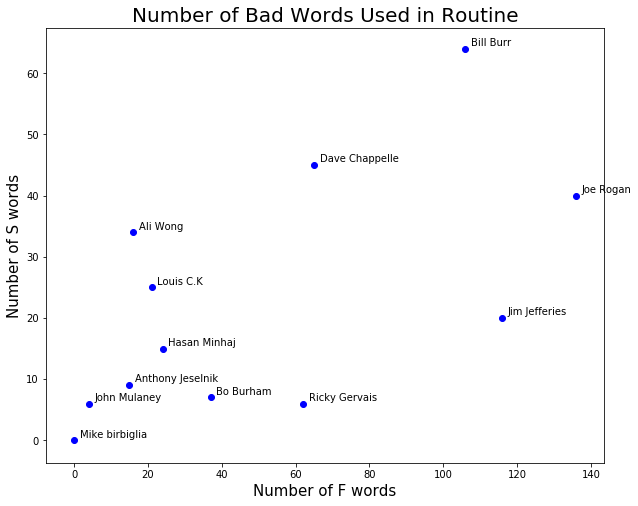

In [36]:
# lets create a scatter plot for our findings
plt.rcParams['figure.figsize'] = [10,8]

for i, comedian in enumerate(data_profanity.index):
    
    x = data_profanity.f_word.loc[comedian]
    y = data_profanity.s_word.loc[comedian]
    plt.scatter(x, y, color= 'blue')
    
    plt.text(x+1.5, y+0.5, full_names[i], fontsize=10)
    
plt.title('Number of Bad Words Used in Routine', fontsize=20)
plt.xlabel("Number of F words", fontsize=15)
plt.ylabel("Number of S words", fontsize=15)

## 1.4.2 Findings

- __Averaging 2 F-Bombs Per Minute!__ -I don't like too much swearing, specially the f-word, which is probably I never heard of Bill Bur, Joe Regan and Jim Jefferies. 
- __Clean Humor__ -It looks like profanity might be a good predictor of the type of comedy I like. Besides Ali Wong, my two other favorite comedians in this group are John Mulaney and Mike birbiglia.

# 1.5 Side Notes

What was our goal for the EDA in our journey? __To be able to take an initial look at our data and see if the results of some basic analysis make some sense.__

My Conclusion - yes, it does, for a first pass. There are definitely somethings that could be better cleaned up, such as adding more stop words or including bi-grams. But we can save that for another day. The results, specially the profanity finding, are interesting and general sense, so we are going to move on.

As a reminder, the data science process is a iterative one. It's better to see some non-perfect but acceptable results to help you quickly decide wether your project is dud or not. instead analysis paralysis and never delivering anything.

__Alice's data science (and life) moto: let go of professionalism!__

# 1.6 Additional Excercise

1- What other word counts do you think would be interesting to compare instead of f-word and s-word? Create a scatter plot and compare them.